In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
Xtrain = np.load("G:/Video_Forgery_Detection_Using_Machine_Learning/video_tampering_dataset/Xtrain.npy")
Ytrain = np.load("G:/Video_Forgery_Detection_Using_Machine_Learning/video_tampering_dataset/Ytrain.npy")

In [3]:
print(Xtrain.shape)
print(Ytrain.shape)

(6990, 240, 320, 3)
(6990,)


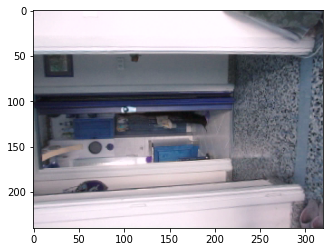

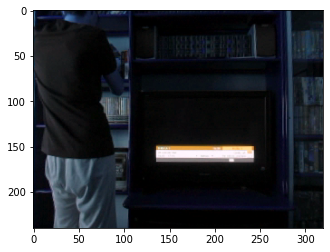

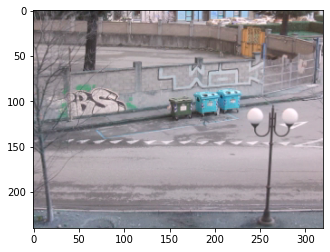

In [4]:
for i in range(3):
    r = np.random.randint(Xtrain.shape[0])
    plt.imshow(Xtrain[r])
    plt.show()

# Resnet Model

In [6]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.optimizers import Adam

# Keras API
from keras.models import Model

Using TensorFlow backend.


In [7]:
model = ResNet50(input_shape=(240,320,3),include_top=False,weights='imagenet')

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step


In [0]:
dr = Dropout(0.2)(model.output)
gap1 = GlobalAveragePooling2D()(dr)
fc1 = Dense(64,activation='relu')(gap1)
fc2 = Dense(1,activation='sigmoid')(fc1)

In [0]:
model_new = Model(inputs=model.input,outputs=fc2)

In [0]:
#for ix in range(len(model_new.layers)):
    #print(ix,model_new.layers[i])

In [0]:
#for ix in range(171):
    #model_new.layers[ix].trainable= False

In [12]:
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 320, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 246, 326, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 120, 160, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 120, 160, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
adam = Adam(lr=1e-4)

model_new.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint

In [16]:
checkpoint = ModelCheckpoint("G:/Video_Forgery_Detection_Using_Machine_Learning/ResNet50_Model/forgery_model.hdf5",save_best_only=True)

hist = model_new.fit(Xtrain,Ytrain,batch_size=32,epochs=100,validation_split=0.2,callbacks=[checkpoint])

Train on 5592 samples, validate on 1398 samples
Epoch 1/100
5592/5592 [==============================] - 204s 36ms/step - loss: 0.4846 - accuracy: 0.7620 - val_loss: 0.3983 - val_accuracy: 0.7990
Epoch 2/100
5592/5592 [==============================] - 179s 32ms/step - loss: 0.4189 - accuracy: 0.7761 - val_loss: 0.3864 - val_accuracy: 0.7911
Epoch 3/100
5592/5592 [==============================] - 180s 32ms/step - loss: 0.3939 - accuracy: 0.7843 - val_loss: 0.3759 - val_accuracy: 0.7997
Epoch 4/100
5592/5592 [==============================] - 181s 32ms/step - loss: 0.3822 - accuracy: 0.7899 - val_loss: 0.3671 - val_accuracy: 0.7933
Epoch 5/100
5592/5592 [==============================] - 180s 32ms/step - loss: 0.3800 - accuracy: 0.7881 - val_loss: 0.3754 - val_accuracy: 0.7883
Epoch 6/100
5592/5592 [==============================] - 180s 32ms/step - loss: 0.3710 - accuracy: 0.7897 - val_loss: 0.3780 - val_accuracy: 0.7890
Epoch 7/100
5592/5592 [==============================] - 180s 32

KeyboardInterrupt: ignored